In [5]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv('C:/Users/rahul/OneDrive/Desktop/titanic.csv')

In [9]:
#To find missing values

In [11]:
missing_values=df.isnull().sum()
print(missing_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [13]:
# To fill missing values

In [15]:
#Replacing missing value in "Age" with mean values
df["Age"].fillna(df["Age"].mean(),inplace=True)

In [17]:
# Replacing missing value "Embarked" column there is no integer values so cannot go for mean, hence we use mode
df["Embarked"].fillna(df["Embarked"].mode()[0],inplace=True)

In [19]:
# if need to drop variable
#Drop 'Cabin' column due to high percentage of missing values
df.drop(columns=['Cabin'], inplace=True)
print("Columns after dropping 'Cabin':")
print(df.columns)

Columns after dropping 'Cabin':
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


In [21]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [23]:
#label encoding for categorical variable
from sklearn.preprocessing import LabelEncoder
#Identify categorical columns
cols = ['Sex' , 'Embarked']
l = LabelEncoder()

for col in cols:
    df[col] = l.fit_transform(df[col])
    print(df[col])

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int32
0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 891, dtype: int32


In [25]:
df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

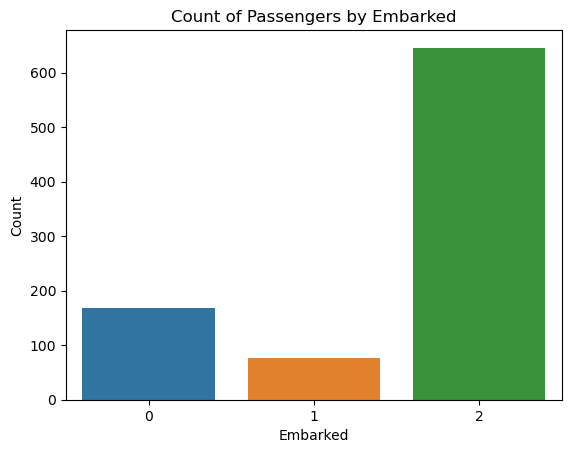

In [27]:
#Visualisation:
#Bar plot for 'Embarked' colum
sns.countplot(x='Embarked', data=df)
plt.title('Count of Passengers by Embarked')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()

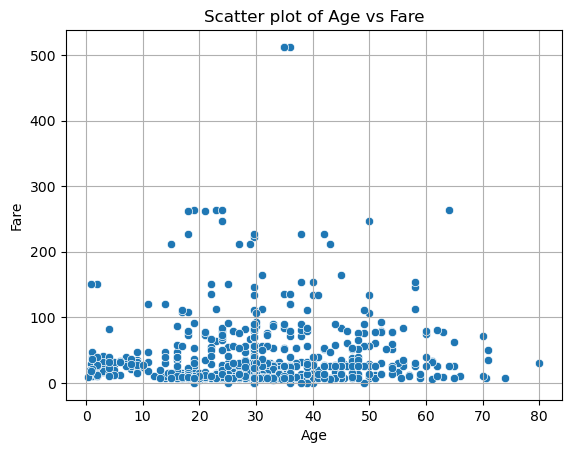

In [29]:
# Scatter plot for 'Age' vs 'Fare'
sns.scatterplot(x='Age', y='Fare' , data=df)
plt.title('Scatter plot of Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.grid(True)
plt.show()

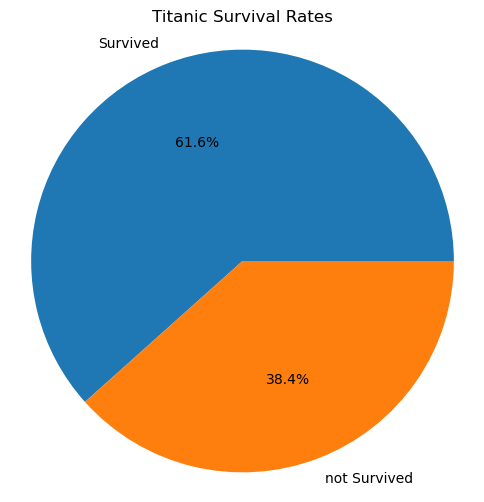

In [31]:
#Pie chart for 'Embarked'
plt.figure(figsize=(6, 6))
labels = ['Survived', 'not Survived']
sizes = df['Survived'].value_counts()
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Titanic Survival Rates')
plt.axis('equal')
plt.show()

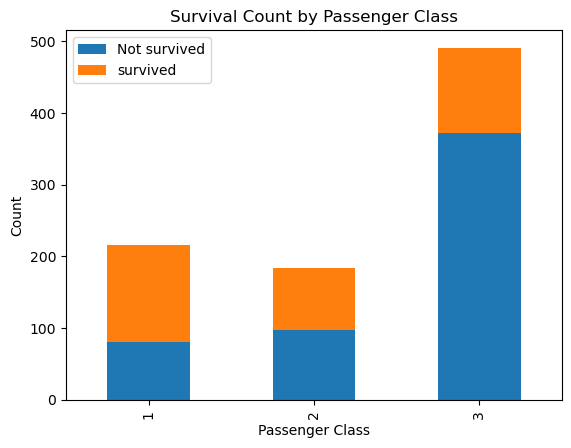

In [33]:
#Joint Bar
JB=df.groupby(['Pclass' , 'Survived']).size().unstack()
JB.plot(kind='bar' , stacked=True)
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.title('Survival Count by Passenger Class')
plt.legend(['Not survived' , 'survived'])
plt.show()

In [35]:
# choose dependent & independent variable.
# Drop unnecessary column.
df=df.drop(columns=['Name' , 'Ticket' , 'PassengerId'],axis=0)
X=df.drop(columns=['Survived'])          #Independent Variable
Y=df['Survived']                        # Dependent Variable

In [37]:
#split data into train test,80:20
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)
print(X.shape, X_train.shape, X_test.shape)

(891, 7) (712, 7) (179, 7)


In [39]:
#import naive bay's algorithms
from sklearn.naive_bayes import GaussianNB

In [41]:
#Fit naive bays model on train data
model = GaussianNB()
model.fit(X_train, Y_train)

GaussianNB()

In [43]:
#predict text data using fitted model
Y_predict = model.predict(X_test)
print(Y_predict)

[0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0
 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0
 0 0 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1 1 0 1 0
 1 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1
 1 0 1 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]


In [45]:
#Model Evaluation
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score,recall_score

In [47]:
#Accuracy
accuracy=accuracy_score(Y_test, Y_predict)
print(accuracy)

0.7877094972067039


In [49]:
#Classification report
C_report = classification_report(Y_test, Y_predict)
print(C_report)

              precision    recall  f1-score   support

           0       0.85      0.79      0.82       110
           1       0.70      0.78      0.74        69

    accuracy                           0.79       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.79      0.79      0.79       179



In [51]:
#Confusion matrics
conf_matrix = confusion_matrix(Y_test, Y_predict)
print(conf_matrix)

[[87 23]
 [15 54]]


In [57]:
#precision
precision=precision_score(Y_test,Y_predict)
print(precision)

0.7012987012987013


In [63]:
# Recall
recall=recall_score(Y_test, Y_predict)
print(recall)

0.782608695652174


In [65]:
# knn algorithm
from sklearn.neighbors import KNeighborsClassifier

In [67]:
k=3
model1=KNeighborsClassifier(n_neighbors=k)
model1.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [69]:
Y1_predict=model1.predict(X_test)
print(Y1_predict)

[0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 1 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0
 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0]


In [71]:
accuracy=accuracy_score(Y_test, Y1_predict)
print(accuracy)

0.7262569832402235


In [73]:
C_report=classification_report(Y_test,Y1_predict)
print(C_report)

              precision    recall  f1-score   support

           0       0.73      0.88      0.80       110
           1       0.72      0.48      0.57        69

    accuracy                           0.73       179
   macro avg       0.72      0.68      0.69       179
weighted avg       0.72      0.73      0.71       179



In [75]:
conf_matrix=confusion_matrix(Y_test, Y1_predict)
print(conf_matrix)

[[97 13]
 [36 33]]


In [77]:
precision=precision_score(Y_test,Y1_predict)
print(precision)

0.717391304347826


In [79]:
recall=recall_score(Y_test, Y1_predict)
print(recall)

0.4782608695652174


In [81]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [83]:
model2=DecisionTreeClassifier(random_state=0)
model2.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=0)

In [85]:
Y2_predict=model2.predict(X_test)
print(Y2_predict)

[0 0 0 1 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 1 0 0 1 0
 0 1 1 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0
 1 1 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0
 1 1 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1]


In [87]:
accuracy=accuracy_score(Y_test, Y2_predict)
print(accuracy)

0.7877094972067039


In [89]:
C_report=classification_report(Y_test, Y2_predict)
print(C_report)

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       110
           1       0.75      0.68      0.71        69

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179



In [91]:
conf_matrix=confusion_matrix(Y_test, Y2_predict)
print(conf_matrix)

[[94 16]
 [22 47]]


In [100]:
precision=precision_score(Y_test,Y2_predict)
print(precision)

0.746031746031746


In [102]:
recall=recall_score(Y_test, Y2_predict)
print(recall)

0.6811594202898551


In [93]:
# Comparision

In [104]:
# Initialize models
models={'Naive Bayes':GaussianNB(),'K-Nearest Neighbors':KNeighborsClassifier(n_neighbors=5),'Decision Tree':DecisionTreeClassifier(random_state=0)}

In [106]:
results = []
for model_name,model in models.items():
    model.fit(X_train, Y_train)
    predict_Y=model.predict(X_test)
    accuracy=accuracy_score(Y_test,predict_Y)
    precision=precision_score(Y_test,predict_Y)
    recall=recall_score(Y_test,predict_Y)
    results.append({"Model":model_name,"Accuracy":accuracy,"precision":precision,"Recall":recall})

In [108]:
import pandas as pd 
Result=pd.DataFrame(results)
print(Result)   

                 Model  Accuracy  precision    Recall
0          Naive Bayes  0.787709   0.701299  0.782609
1  K-Nearest Neighbors  0.743017   0.709091  0.565217
2        Decision Tree  0.787709   0.746032  0.681159
